In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score

In [5]:
#Exercise 1 - Predicting Wine Quality using MLP.
#Paert1: Load and Explore the Dataset

# Load Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Convert to DataFrame
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
display(df.head())

Dataset shape: (178, 14)

First 5 rows:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [ ]:
#1. How many samples and features does the dataset contain?
#2. What are the different wine classes (targets) and their distribution?
#3. Are there any missing values in the dataset?
#4. What are the names of the three wine classes?

In [7]:
print("Number of samples:", X.shape[0])
print("Number of features:", X.shape[1])

Number of samples: 178
Number of features: 13


In [11]:
print("Target classes:", np.unique(y))
print("\nClass distribution:\n", pd.Series(y).value_counts())

Target classes: [0 1 2]

Class distribution:
 1    71
0    59
2    48
Name: count, dtype: int64


In [12]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
target                          0
dtype: int64


In [13]:
print("Wine class names:", wine.target_names)

Wine class names: ['class_0' 'class_1' 'class_2']


In [15]:
#Data Splitting & Scaling

# Train-test split (80-20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Training set shape:", X_train_scaled.shape)
print("\nTesting set shape:", X_test_scaled.shape)
print("\nScaler mean:", scaler.mean_)
print("\nScaler scale:", scaler.scale_)

Training set shape: (142, 13)

Testing set shape: (36, 13)

Scaler mean: [1.29714789e+01 2.34000000e+00 2.36485915e+00 1.96253521e+01
 9.96338028e+01 2.27373239e+00 1.98535211e+00 3.60140845e-01
 1.60021127e+00 4.98964788e+00 9.48985915e-01 2.60619718e+00
 7.39478873e+02]

Scaler scale: [7.99690034e-01 1.09740026e+00 2.67433646e-01 3.36892252e+00
 1.48847587e+01 6.19261952e-01 9.48593965e-01 1.18790773e-01
 5.77731684e-01 2.32671090e+00 2.25847231e-01 6.87217017e-01
 3.00435522e+02]


**1. Why do we split the data before scaling?**

To prevent information from the test data leaking into the training process and to ensure a fair evaluation on unseen data.

**2. Why should we fit the scaler only on training data?**

Because the scaler should learn statistics (mean and standard deviation) only from training data, not from test data, to avoid data leakage.

**3. What is the purpose of using random state?**

It ensures reproducible results by generating the same data split every time the code is run.

**4. What do the scaler’s mean and scale attributes represent?**

The mean is the average value of each feature in the training data, and the scale is the standard deviation used to standardize the features

In [18]:
#Part2: Model Definition and Training
#Create and Configure MLP Model

mlp = MLPClassifier(
    hidden_layer_sizes=(50, 25),
    activation='relu',
    solver='adam',
    max_iter=500,
    random_state=42
)

print("Model architecture:", mlp.hidden_layer_sizes)
print("Activation function:", mlp.activation)
print("Solver:", mlp.solver)
print("Maximum iterations:", mlp.max_iter)

Model architecture: (50, 25)
Activation function: relu
Solver: adam
Maximum iterations: 500


In [20]:
#Train the Model

mlp.fit(X_train_scaled, y_train)

print(f"Training completed in {mlp.n_iter_} iterations")
print(f"Final training loss: {mlp.loss_:.4f}")
print(f"Training set accuracy: {mlp.score(X_train_scaled, y_train):.4f}")

if mlp.n_iter_ == mlp.max_iter:
    print("Warning: Model may not have converged. Consider increasing max_iter.")
else:
    print("Model converged successfully.")

Training completed in 195 iterations
Final training loss: 0.0068
Training set accuracy: 1.0000
Model converged successfully.


**1. What does the loss value represent?**

The loss value measures how far the model’s predictions are from the actual target values; lower loss indicates better model performance.

**2. How many iterations did the training take to converge?**

The training took mlp.n_iter_ iterations to converge (this value is printed after training).

**3. What might it mean if the loss is very high?**

A very high loss may indicate poor learning due to underfitting, incorrect hyperparameters, insufficient training iterations, or unscaled features.

**4. What is the training accuracy of your model?**

The training accuracy is given by mlp.score(X_train_scaled, y_train), which represents the proportion of correctly classified training samples.

In [21]:
#Part3: Model Evaluation
#Make Predictions and Calculate Basic Metrics

y_pred = mlp.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")
print("Number of test samples:", len(y_test))
print("Number of correct predictions:", sum(y_pred == y_test))

Test Accuracy: 1.0000 (100.00%)
Number of test samples: 36
Number of correct predictions: 36


Classification Report:
              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        12
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00        10

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



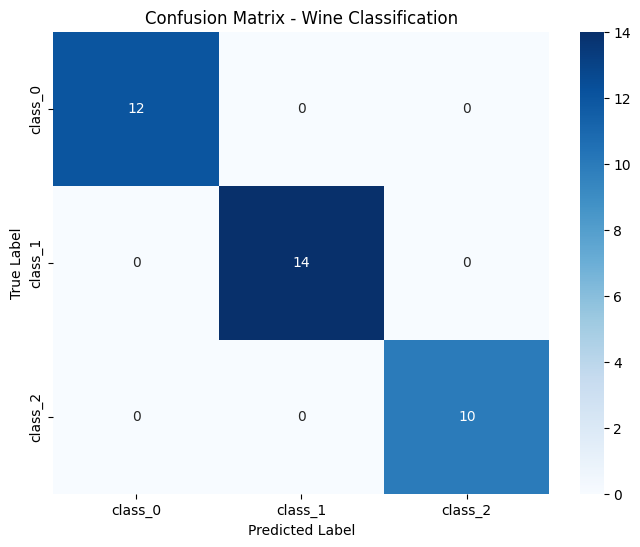

In [23]:
#Comprehensive Evaluation

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=wine.target_names))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues',
    xticklabels=wine.target_names,
    yticklabels=wine.target_names
)
plt.title('Confusion Matrix - Wine Classification')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

In [24]:
#Additional Metrics

precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Weighted Precision: {precision:.4f}")
print(f"Weighted Recall: {recall:.4f}")
print(f"Weighted F1-Score: {f1:.4f}")

Weighted Precision: 1.0000
Weighted Recall: 1.0000
Weighted F1-Score: 1.0000


**1. Which class has the best performance? Which has the worst?**

All three classes (class_0, class_1, class_2) have equal and perfect performance.
Each class is classified correctly with no misclassifications, so no class performs worse than the others.

**2. What is the precision, recall, and F1-score for each class?**

From the confusion matrix:

class_0:
Precision = 1.00, Recall = 1.00, F1-score = 1.00

class_1:
Precision = 1.00, Recall = 1.00, F1-score = 1.00

class_2:
Precision = 1.00, Recall = 1.00, F1-score = 1.00

This indicates 100% correct classification for all classes.

**3. Based on the confusion matrix, what types of errors is the model making?**

The model makes no errors.
There are no false positives or false negatives, as all predictions lie on the diagonal of the confusion matrix.

**4. Is there any class imbalance affecting the results?**

Although the number of samples per class is slightly different (12, 14, and 10),
class imbalance does not affect performance, because the model correctly classifies all samples across all classes.